# Analyzing Twitch Streamer Statistics: What matters?
### Victoria Wu
## Introduction

Twitch is a streaming platform that was founded in 2011, and it allows anybody to start streaming at any time. It's considered to be the most popular streaming platform for gamers, but it doesn't necessarily restrict streamed content to the gaming space. As such, anybody can start streaming about almost anything at any time, making it an extremely accessible platform for beginners.

But even if anybody *can* start streaming, not everybody gets famous or is able to make an income off of it. So what helps make some streamers more successful than others? Do any specific choices affect their success? Luckily, there are many statistics that can be gathered about streamers, some of which are even displayed directly to streamers.

Here's an example of statistics that a streamer might see in their account:   
![Streamer Analytics (Twitch Analytics Overview)](https://assets.help.twitch.tv/article/img/000002184-01.png)  
(Source: [Twitch Analytics Overview](https://help.twitch.tv/s/article/channel-analytics?language=en_US))

Thus, using available channel statistics, I wanted to graphically and statistically see how different channel statistics affect each other.

## Data Collection

To analyze data, you first have to find a data source and retrieve its data. For this, I chose to use a dataset I found on Kaggle ([Top Streamers on Twitch](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata?datasetId=837885)), containing channel statistics for the top 1000 streamers between 2019 and 2020. Because the dataset is provided in CSV format, I chose to retrieve its data by downloading the CSV and simply loading it into a Pandas DataFrame using Pandas's `read_csv` function. Storing the data in a Pandas DataFrame object will allow me to easily reference and model data in the future.

After creating the DataFrame, I also decided to rename the columns for convenience. With these two steps alone, we're able to set up the DataFrame with our data, and we can now move on to analyzing the data.

In [1050]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

twitch = pd.read_csv('twitchdata.csv')
twitch

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [1051]:
twitch.columns = ['channel', 'min_watch', 'min_stream', 'peak_viewers', 'avg_viewers', 'followers', 'followers_gained', 'views_gained', 'partnered', 'mature', 'language']
twitch

,channel,min_watch,min_stream,peak_viewers,avg_viewers,followers,followers_gained,views_gained,partnered,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


<a id='analysis_goals'></a>
Now looking at the dataset and the provided channel statistics, I come up with some questions to focus on during data analysis:
  1. Are mature streamers more likely to be popular than non-mature streamers?
  2. Does being partnered with Twitch improve success/vice-versa?
  3. Are streamers likely to do better if they speak in English?

In forming these questions, I also had to define which statistics measure a streamer's success. This means that I have to consider what matters the most to streamers. The answer came out to be viewers, as streamers rely on subscriptions (a paid monthly subscription to get benefits on that specific streamer's stream) and donations the most. Thus, I chose `followers` and `avg_viewers` to be the statistics that best measure a streamer's success. 

It's important to note that there is a very large difference between being a follower and being a subscriber on Twitch. A user can follow a streamer for free, and following a streamer puts that streamer's content on the main page, giving that streamer more visibility to their followers. On the other hand, subscribers pay monthly to get channel perks and benefits. (In terms of Youtube, being a Twitch follower is like being a Youtube subscriber, while being a Twitch subscriber is like being a Youtube channel member.) Thus, subscribers are directly correlated to a streamer's financial gains while followers are indirectly correlated, making subscriber count a better statistic for measuring a streamer's success.

However, subscriber count for channels are not included in the dataset, and is additionally currently kept private on Twitch. Thus, I decided to use `followers` as an estimator of the number of subscribers that a streamer might have, as it's still an indicator of viewer interest and investment.

The other 'success' statistic that I chose was `avg_viewers`, for similar reasons to why I chose `followers` as a success metric; if a streamer has higher average viewers, then they're more likely to have more subscribers and be popular/financially successful on Twitch.

# Data Management/Representation

But before we start analyzing the data, it's important to handle any missing data first. Thus, I run `info()` on my twitch dataframe/dataset, which directly shows me how many non-null entries are in each column:

In [1052]:
twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel           1000 non-null   object
 1   min_watch         1000 non-null   int64 
 2   min_stream        1000 non-null   int64 
 3   peak_viewers      1000 non-null   int64 
 4   avg_viewers       1000 non-null   int64 
 5   followers         1000 non-null   int64 
 6   followers_gained  1000 non-null   int64 
 7   views_gained      1000 non-null   int64 
 8   partnered         1000 non-null   bool  
 9   mature            1000 non-null   bool  
 10  language          1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Because I know that the dataframe has 1000 entries in total, seeing 1000 non-null entries in each column signals to me that I don't have to deal with missing data. This means that I can move on to removing irrelevant columns in the dataset.

This leads me to drop `followers_gained` and `views_gained` throughout the year, as it doesn't provide useful information to me — even though they give me an idea of how a streamer's popularity changed within the year, I don't know how/if the streamer changed their behavior at all between the start/end of the time period that both variables refer to. For example, it's possible that a streamer decided to increase their streaming time at some point within the year, which thus increased both `followers_gained` and `views_gained` for the streamer. However, this change is not recorded in the dataset, so I have no knowledge of it at all. Lacking the right information to correctly conclude a relationship is more harmful than good because it increases the probability that an entirely incorrect conclusion is created. As such, these metrics are not helpful in understanding what qualities/features of streams might have an impact, and I drop them from the dataset.

In [1053]:
twitch.drop(columns=['followers_gained', 'views_gained'], inplace=True)
twitch

,channel,min_watch,min_stream,peak_viewers,avg_viewers,followers,partnered,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,True,False,English
...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,True,False,English


# Exploratory Data Analysis

Before diving into the questions that I [outlined earlier](#analysis_goals), I'm interested in learning general information about my dataset, so I use `describe` to aptly describe my dataframe.

In [1054]:
twitch.describe()

,min_watch,min_stream,peak_viewers,avg_viewers,followers
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06


Seeing summary statistics about the dataset provides some interesting insight about the scale/size of information within it, which gives me a better 'feel' and understanding of the data.

It would also be insightful to take a look into the statistical correlation between each column, which is highly related to what I'm interested in (the relationship of variables).

In [1055]:
twitch.corr()

,min_watch,min_stream,peak_viewers,avg_viewers,followers,partnered,mature
min_watch,1.000000,0.150588,0.582797,0.476165,0.620234,0.038258,-0.043197
min_stream,0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.007073,0.044978
peak_viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.028112,-0.082750
avg_viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,-0.008983,-0.081648
followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.044418,-0.088521
partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,1.000000,0.000972
mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,0.000972,1.000000


I then create a heatmap of column correlation values, with darker squares indicating a higher correlation, to visually represent the data. This allows for a much better and faster understanding of the data — for example, it's immediately obvious that most variables are only weakly correlated with `partnered` and `mature`, which makes sense given that they're binary variables while the others are quantitative variables. However, we'll look more into that later.

Text(0.5, 1.0, 'Visual Representation of Column Correlation')

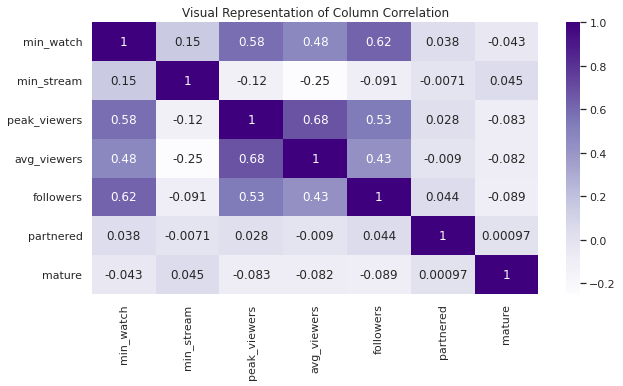

In [1056]:
sns.heatmap(twitch.corr(), cmap='Purples', annot=True)
plt.title('Visual Representation of Column Correlation')

## Convenience Functions

Before getting into data analysis, here are some convenience functions that I'll use throughout my code:
  * `proper(x)`: the function takes in a string variable name (`x`) and converts it to the 'proper' English version of the string. (Useful for labeling/titling graphs.)
  * `pltLabel(x, y, titleAppend='', titleOverwrite='')`: takes in x, y string variable/column names and uses that information to title the graph, label the x and y axes, and display the figure/graph. It also has convenience features to append to the title or overwrite the title and escape the title format.

In [1057]:
# returns 'proper' ver of string (assumed to be column name); useful for labels
def proper(x):
    if 'min' in x:
        x = x[x.index('_')+1:] + ' Time (minutes)'
        
    return ' '.join(x.split('_')).replace('avg', 'average').title()

In [1058]:
def pltLabel(x, y, titleAppend= '', titleOverwrite= ''):
    
    # returns a string with the '(minutes)' specification removed
    def remMinutes(x):
        return x if 'minutes' not in x.lower() else x[:x.index('(')-1]
    
    if titleOverwrite == '':
        title = f'{remMinutes(y)} vs. {remMinutes(x)}'
        if titleAppend != '': title += ', '+titleAppend
    else:
        title = titleOverwrite

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Now to finally start some data analysis! Above, I defined `followers` and `avg_viewers` to be indicators of success, and assumed that they would be positively correlated. However, is this true? If so, to what degree? In the heatmap above, we can see that the correlation between `followers` and `avg_viewers` ($0.43$) indicates a likely weak positive relationship between the two variables. But what does that look like in the data directly, and what does the relationship actually look like? Thus, I will start by analyzing this assumption before analyzing other outlined questions.

## The Relationship between Followers and Average Viewers?

To assess the relationship between `followers` and `avg_viewers`, I start out by creating a scatterplot of each column and performing a linear regression on the two columns.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


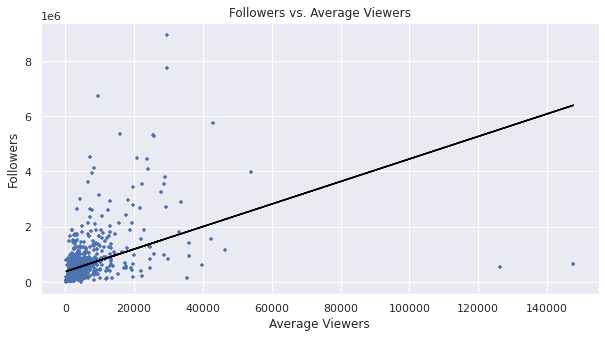

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     224.2
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           7.07e-46
Time:                        23:36:05   Log-Likelihood:                -14915.
No. Observations:                1000   AIC:                         2.983e+04
Df Residuals:                     998   BIC:                         2.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.752e+05   2.64e+04     14.199      

In [1059]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model

x_col = 'avg_viewers'
y_col = 'followers'
propX = proper(x_col)
propY = proper(y_col)

# check correlation btwn followers + avg_viewers
twitch.plot.scatter(y= y_col, x= x_col, marker='+')

x = twitch[x_col]
a = sm.add_constant(x)

m, b = np.polyfit(x, twitch[y_col], 1)
plt.plot(x, m*x+b, color='black')
pltLabel(propX, propY)

result = sm.OLS(twitch[y_col], a).fit()
print(result.summary())

Not only does the slope look extremely unfit to the data, but the statistics indicate a similar verdict; the $R^2$ of the regression is only $0.183$, which is fairly small and represents a poor fit of the model to the data. However, the graph also shows me that there are 2 extreme outliers to the data, which is likely impacting OLS's results due to their leverage. As such, I choose to repeat the process with those two extreme outliers removed:

Entries being removed:
        channel   min_watch  min_stream  peak_viewers  avg_viewers  followers  \
81      dota2ti  1017577605        6315        483530       147643     663297   
109  dota2ti_ru   812538090        6195        457060       126232     541644   

     partnered  mature language  
81        True   False  English  
109       True   False  Russian  



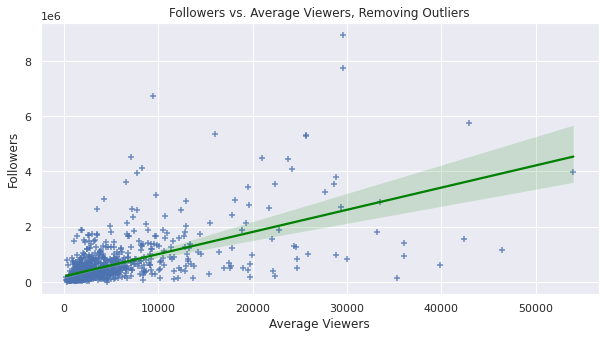

In [1060]:
# removing extreme outliers
print('Entries being removed:', twitch[twitch.avg_viewers > 100000], '', sep='\n')
n_2 = sns.regplot(data = twitch[twitch.avg_viewers < 100000], x= x_col, y= y_col, 
            marker='+', line_kws={'color':'green'})
pltLabel(propX, propY, 'Removing Outliers')

Because I chose to use Seaborn's `regplot` function to plot the data, regression slope, and confidence interval of the regression estimates, I don't have the exact coefficients for the data this time. However, by comparing the y-value of the slope at `min_stream` around 50,000 for the two graphs, it's clear that the slope of this new graph (with the extreme outliers removed) is larger. This supports my hypothesis from earlier, that the outliers were affecting OLS's results (specifically, it was reducing the slope coefficient because the outliers had a very low follower count.

However, I'm still wary of using this as the final plot to interpret because it seems that the data is heteroskedastic — that is, the variance of residuals increases throughout the graph. Thus, the data violates the assumption that the data is homoskedastic, which is necessary for having minimum variance coefficient estimators from OLS. As such, I finally regress on the densest part section of `avg_viewers`, which the graph suggests to be `avg_viewer` $ < 10,000$. Let's confirm that assumption first:

In [1061]:
# handling majority of data
twitch2 = twitch[twitch.avg_viewers < 10000]
N = len(twitch2)

print('\nLENGTH:', N, ';', round(N/len(twitch)*100, 3), '% of dataset', '\n')


LENGTH: 901 ; 90.1 % of dataset 



Knowing that my selected sample of the population, `avg_viewer` $<10,000$, accounts for around 90% of the data makes me comfortable enough to focus on the relationship instead of the entire dataset. Thus, I repeat my initial steps, and run a regression whose slope is plotted atop a scatterplot of `followers` to `avg_viewers`.

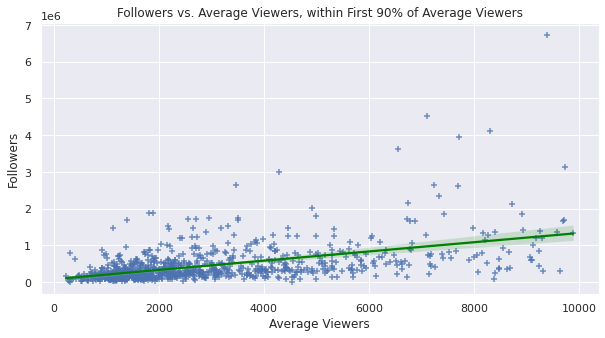

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     303.3
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           9.51e-59
Time:                        23:36:07   Log-Likelihood:                -13006.
No. Observations:                 901   AIC:                         2.602e+04
Df Residuals:                     899   BIC:                         2.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.061e+04   2.57e+04      3.131      

In [1062]:
sns.regplot(data = twitch2, x= x_col, y= y_col, marker='+', line_kws={'color':'green'})
pltLabel(propX, propY, 'within First 90% of Average Viewers')

# low R^2
a = sm.add_constant(twitch2[x_col])
result = sm.OLS(twitch2[y_col], a).fit()

print(result.summary())

This final graph shows us that for streamers with the bottom 90% of average viewers, there is a large impact of each additional average viewer on the number of followers. Specifically, the coefficient on `avg_viewer` reveals that for each extra average viewer that a streamer has, their follower count tends to increase by around 125. However, the size of the coefficient should be taken with a grain of salt, since the $R^2$ for this regression came out to be $0.252$, representing that the current regression model has a better fit on the data than the original did, but still a relatively weak relationship.

Yet still, I believe that the scatterplot shows a clear positive relationship between average viewers and followers, thus confirming my initial assumption.

## Mature

Now to dive into the first question: are mature streamers more likely to be popular than non-mature streamers?

Because `mature` is a boolean variable (streamers are either marked as a mature channel or not), there are limited methods to usefully represent data. After some consideration, I came up with 3 main plots/figures to demonstrate/visualize data relating to `mature`:
  1. Pie graph — this addresses the most basic question, what percentage of the sample is marked as `mature`?
  2. Color-coded scatter plot of `followers` to `avg_viewers` — because `mature` is only a binary variable, it's hard to plot data using its information. But we already have 2 defined success variables, so why not color-code the scatter plot from the previous section? In that way, we can see potential relationships with the plotted data itself (e.g. if there's a difference in the relationship between followers to average viewers or if there's a particular part of the follower/average viewer population that they tend to make up) given whether the streamer is marked as mature or not.
  3. Violin plots of average viewers between mature/non-mature population — this shows the statistical effect of being a mature channel. While the scatterplot provides a helpful visualization of how mature/non-mature streamers perform, the violin plots provide a visualization for summary statistics that are crucial for making conclusions.
  
Below, I create a function generalized for boolean variables to plot each of the graphs discussed above. After that, I call the function with the boolean column in my dataset being specified to `mature`, which then creates the graphs.

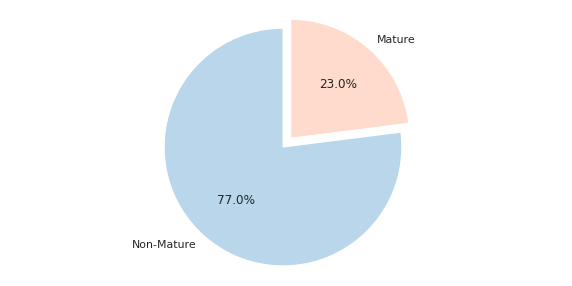

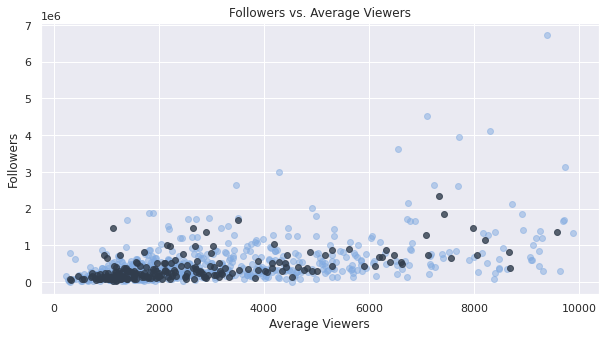

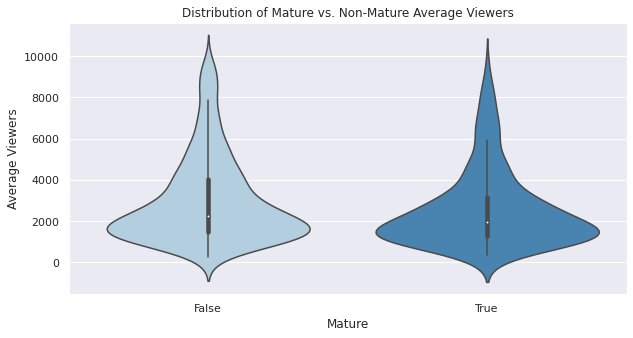

In [1075]:
def boolean_analysis(col, x = 'avg_viewers', y='followers', c1 = 'Blues', c2 = 'Reds', c3='#69d'):
    count = twitch.groupby(col).count()['channel'].values
    
#     pie chart
    plt.pie(twitch.groupby(col).count()['channel'].values,
            explode=[0.1, 0],
            labels=[f'Non-{col.title()}', col.title()], 
            colors=[sns.color_palette(c1)[np.random.randint(0,5)], sns.color_palette(c2)[np.random.randint(0,5)]], 
            autopct='%1.1f%%',
            startangle=90)

    plt.axis("equal")
    plt.show()
    
    propX = proper(x)
    propY = proper(y)
    
    plt.rc('figure', figsize=(10, 5))

#     scatterplots
#     minority population is marked with the darker color for viewability
#     majority population goes in background for viewability
    if count[0] > count[1]:
        plt.scatter(x=twitch2[twitch2[col] == False][x], y=twitch2[twitch2[col] == False][y], color=sns.light_palette(c3, reverse=True)[np.random.randint(0, 5)], alpha=0.5)
        plt.scatter(x=twitch2[twitch2[col]][x], y=twitch2[twitch2[col]][y], color=sns.dark_palette(c3)[np.random.randint(0, 5)], alpha=0.8)

    else:
        plt.scatter(x=twitch2[twitch2[col]][x], y=twitch2[twitch2[col]][y], color=sns.light_palette(c3, reverse=True)[np.random.randint(0, 5)], alpha=0.5)
        plt.scatter(x=twitch2[twitch2[col] == False][x], y=twitch2[twitch2[col] == False][y], color=sns.dark_palette(c3)[np.random.randint(0, 5)], alpha=0.8)
        
    pltLabel(propX, propY)
    
#     violin plots
    sns.violinplot(x= col, y= x, data=twitch2, palette=f'{c1}')
    pltLabel(col.title(), propX, titleOverwrite=f'Distribution of {col.title()} vs. Non-{col.title()} {propX}')
    
boolean_analysis('mature')

Through the initial pie chart, we learn that a majority of streamers in the dataset are *not* marked as mature.  
The scatterplot then revealed that the spread of followers to average viewers for streamers marked as mature vs. non-mature is approximately the same. This is clear to me because the points marked as mature, or the darker-colored points, are in approximately the same locations as the non-mature streamer points in light blue. Furthermore, they even have the same distribution in the scatterplot — where the non-mature data is clustered, dispersing, or even increasing, the mature data follows the same trend.  
Finally, the violin plot echoes that the distribution of average viewers for mature/non-mature streamers is approximately the same. In looking closely, you can see that the mean number of average viewers is slightly lower for mature streamers than non-mature viewers, and that the mature streamer distribution is overall less spread out. However, a lot of the other summary statistics are similar — not only are their minimum and maximum values approximately the same, but their distributions also follow the same skew/general curve shape.

Thus, these 3 plots lead me to conclude that maturity rating on a streamer has at most a mildly negative impact on a streamer's success, if it has any impact at all.

## Partnered

Moving on to analyze the impact of being partnered with Twitch! I start off by calling `boolean_analysis`, the previous generalized function, with the specified boolean column in question now being `partnered`. 

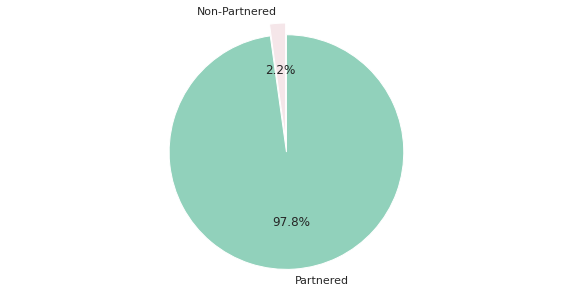

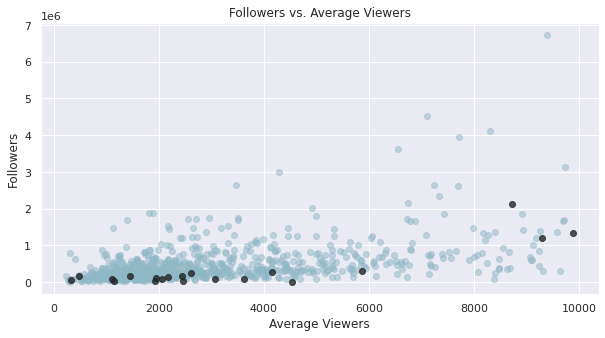

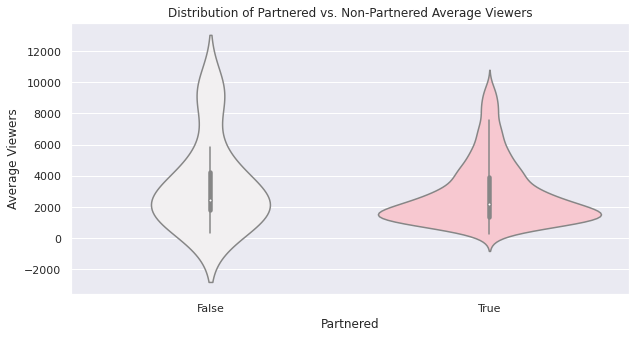

In [1064]:
boolean_analysis('partnered', c1='light:pink', c2='light:#5B9', c3='#7ab')

In contrast to the proportion of streamers marked as mature within the dataset, a vast majority of streamers within this dataset are marked as Twitch partners ($97.8\%$ partnered vs. $23\%$ mature).  
While the majority of streamers being partnered with Twitch might seem like an upside to measuring the effect of being partnered on streamer success, the scatterplot reveals the issues with having little variation in data. With the dark-colored points in this scatterplot marking the observations for streamers who aren't partnered with Twitch in this scope of the dataset, the scatterplot clearly conveys that there are very few unpartnered streamers. This means that it's hard to clearly define whether the unpartnered streamers follow the same distribution of success as the partnered streamers, since it's possible that a larger sample size of unpartnered Twitch streamers would follow a distribution similar to that of partnered streamers.  
The violin plot reveals that the mean number of average viewers in this sample is slightly lower for partnered streamers than for unpartnered streamers. However, this is much less surprising when you consider the few observations/sample size that the unpartnered population is basing the average on, when compared to the number of observations being used to calculate the mean average viewers for partnered Twitch streamers.

As such, I'd say that the sample size of unpartnered Twitch streamers is too low to confidently establish the effect that being a Twitch partner has on a streamer's success. However, it's interesting to consider the proportion of partnered streamers within this dataset, in the context of the dataset. Given that this dataset was meant to capture some stream statistics for the top 1000 Twitch streamers at the time, it's clear that there must be some relationship between being a Twitch partner and success. However, there aren't enough data/unpartnered high performing Twitch streamers to allow for accurate analysis on the effect of being a Twitch partner on specific statistics.

## Language

Finally, it's time to address my last question: Are streamers likely to do better if they stream in English? I'm curious about this question because English is one of the most popular languages in the world, and a lot of the internet is in English. Furthermore, Twitch is considered to be an American streaming service, so there may be a bias toward English material.

First, let's start off with understanding the spread/distribution of languages: which languages are most frequently used in the dataset?

In [1065]:
for k, v in twitch.language.value_counts().to_dict().items():
    print(k, ':', v, f'({v/1000}%)')

English : 485 (0.485%)
Korean : 77 (0.077%)
Russian : 74 (0.074%)
Spanish : 68 (0.068%)
French : 66 (0.066%)
Portuguese : 61 (0.061%)
German : 49 (0.049%)
Chinese : 30 (0.03%)
Turkish : 22 (0.022%)
Italian : 17 (0.017%)
Polish : 12 (0.012%)
Thai : 11 (0.011%)
Japanese : 10 (0.01%)
Czech : 6 (0.006%)
Arabic : 5 (0.005%)
Hungarian : 2 (0.002%)
Slovak : 1 (0.001%)
Other : 1 (0.001%)
Greek : 1 (0.001%)
Finnish : 1 (0.001%)
Swedish : 1 (0.001%)


Above, we can see that English is the most popular language by far. So do English streamers have more success? First, let's start out by creating a color-coded scatterplot of followers to average viewers, as we've been doing for the other metrics.

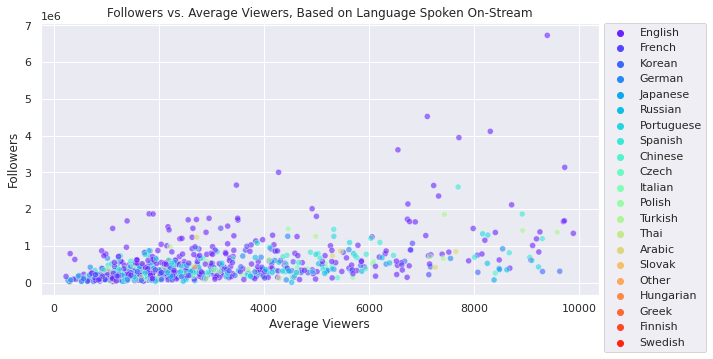

In [1066]:
# scatterplot
sns.scatterplot(data=twitch2, x=x_col, y=y_col, hue='language', palette='rainbow', alpha=0.6)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
pltLabel(propX, propY, 'Based on Language Spoken On-Stream')

The first thing that I notice is that most of the points are purple, which makes sense given that English encompasses just under 50% of the entire dataset. Yet more importantly, this scatterplot lets me see that all the higher follower-count streamers stream in English. However, most of the streamers with low follower count but high average viewer count are streamed in other languages. 

Let's get a better understanding of language's effect on `followers` and `avg_viewers` through some bar graphs:

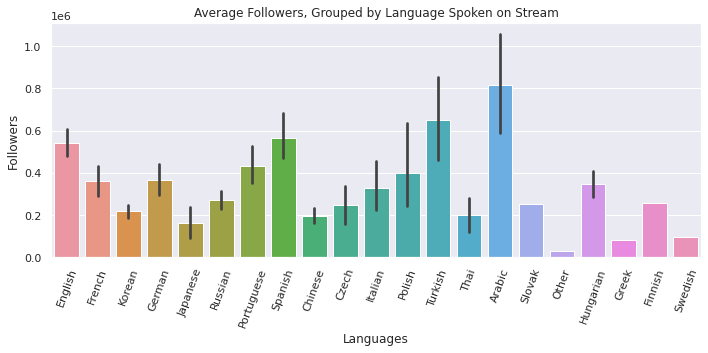

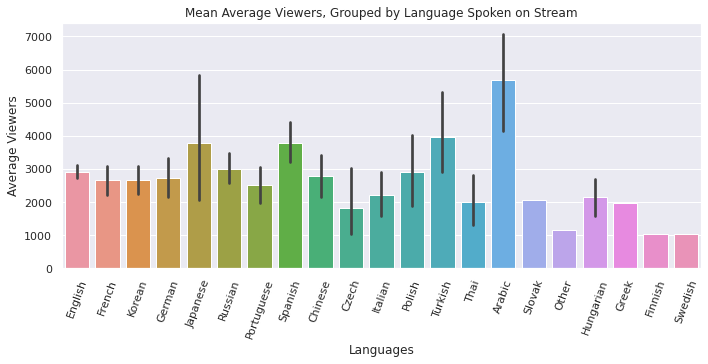

In [1067]:
# bar plots
sns.barplot(data=twitch2, x='language', y=y_col)
plt.xticks(rotation=70)
plt.tight_layout()
pltLabel('Languages', propY, titleOverwrite='Average Followers, Grouped by Language Spoken on Stream')

sns.barplot(data=twitch2, x='language', y=x_col)
plt.xticks(rotation=70)
plt.tight_layout()
pltLabel('Languages', propX, titleOverwrite='Mean Average Viewers, Grouped by Language Spoken on Stream')

The bar graphs are interesting because they reveal that although the highest performing streamers stream in English, the average number of followers and average viewers on English streams is far from extraordinary. In fact, it seems that English is ranked to have the fourth highest average follower count in this dataset, far from my expectation of English having one of the highest follower counts. Still, the fact that it's clearly a higher performing language leads me to conclude that English likely has a slightly positive impact on follower count.

English's peformance in average viewer count is similar, with English being around 4th/5th place. However, this graph also shows a much lower deviation in results within average viewers, with many average viewers being around either 3000, 2000, or 1000. Thus, I would say that English doesn't cause a greatly positive impact on average viewers, but it still puts you in a higher average viewer bracket.

Something that's important to note while interpreting these bar graphs is the error on each one — because English has the most data, it also has smaller confidence intervals than most other languages. For example, Arabic performs the highest for both follower count and average viewer count, but also has a much broader range of possible values. This makes the data for languages with high standard deviation/error less reliable, and should be taken into account when analyzing the bar plots. Applying this to the graphs above, it's clear that if each language took its lowest average follower count, English would be around the second top performing language in follower count. In contrast, the same cannot be said for the bar plot of languages to average viewers; even at Arabic and Spanish's lowest average viewer count in the confidence interval, it's still much higher than English's highest feasible average viewer count. This leads me to the same conclusions as before: that English is a higher performing language in both followers and average viewers, but there is a high correlation between high follower count and streaming in English.

# Hypothesis Testing

Before we wrap up our data analysis, let's take a look into `mature` one more time. Here are the graphs from before:

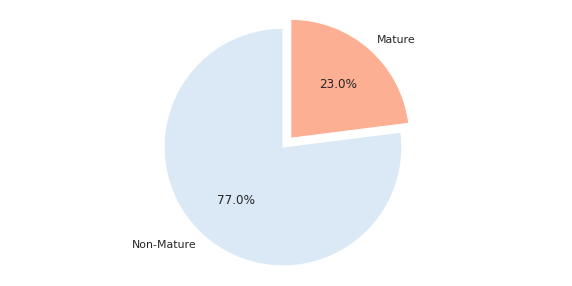

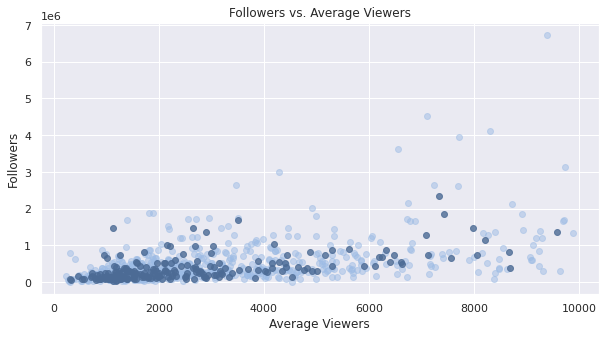

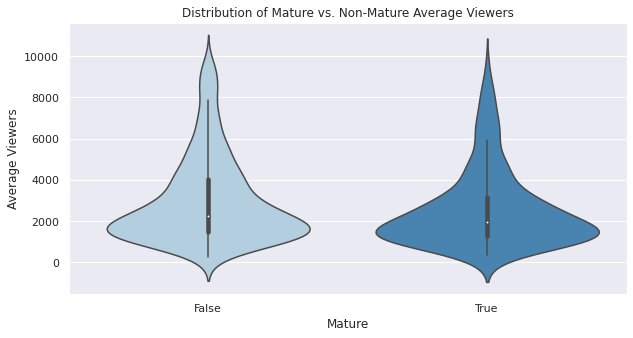

In [1068]:
boolean_analysis('mature')

We decided that the violin plots for mature/non-mature for `avg_viewers` were very similar, but what do the violin plots for mature/non-mature for `followers` look like?

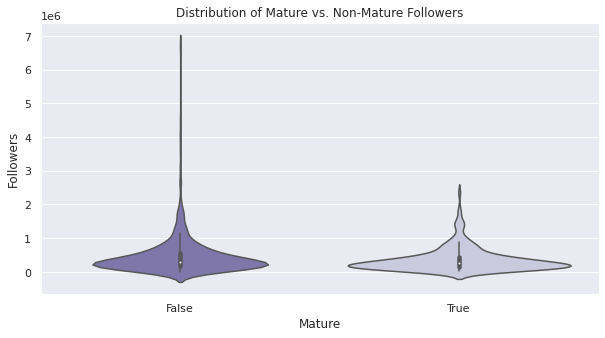

In [1069]:
# violin plot of mature/nonmature for followers
sns.violinplot(x= 'mature', y= 'followers', data=twitch2, palette=f'Purples_r')
pltLabel('Mature', 'Followers', titleOverwrite=f'Distribution of Mature vs. Non-Mature Followers')

In [1070]:
mature = twitch[twitch.mature]
nonmature = twitch[twitch.mature == False]

print('nonmature low/high:', nonmature.followers.min(), nonmature.followers.max())
print('difference:', nonmature.followers.max() - nonmature.followers.min(), '\n')

print('mature low/high:', mature.followers.min(), mature.followers.max())
print('difference:', mature.followers.max() - mature.followers.min())

nonmature low/high: 3660 8938903
difference: 8935243 

mature low/high: 28818 5265659
difference: 5236841


Again, the distributions for mature/non-mature look similar in shape, but it's clear that non-mature streamers have a much larger range/spread than mature streamers. So, is the impact of being marked as a `mature` channel non-negligible?

Let's test this with a hypothesis test, with the null hypothesis being that the average followers for mature and non-mature streamers are the same.   
$H_0: \mu_{follower, mature} = \mu_{follower, non-mature}$   
$H_A: \mu_{follower, mature} \neq \mu_{follower, non-mature}$

We can do that simply with a t-test:

In [1071]:
from scipy import stats

print(stats.ttest_ind(mature.followers, nonmature.followers))
print('t-critical value at 𝛼 = 0.05:', stats.t.ppf(q= 1 - 0.05/2, df= 998))
print('t-critical value at 𝛼 = 0.01:', stats.t.ppf(q= 1 - 0.01/2, df= 998))

Ttest_indResult(statistic=-2.8074935086573842, pvalue=0.005090151971780063)
t-critical value at 𝛼 = 0.05: 1.9623438462163336
t-critical value at 𝛼 = 0.01: 2.580764586385345


The results are very interesting: comparing the t-statistic to the t-critical value at both $\alpha=0.05$ and $\alpha=0.01$, it's clear that $t-stat < t-crit_{\alpha=0.01}$, meaning that we can reject the null-hypothesis that the average follower count is the same between mature and non-mature streamers with 99% confidence. (Note: `ttest_ind` actually returns the p-value along with the statistic, so we could've seen that the t-test results were significant at *almost* 99.5% confidence, but I wanted to clearly compare t-statistics to prove this point.)

This test reveals that my previous conclusion (`mature` has a slightly negative impact on success) could actually be non-negligible, which is surprising to me. As such, why don't we also perform a t-test to check whether mature/non-mature average `avg_viewers` are different or not? 

Using these hypotheses:   
$H_0: \mu_{avg\_viewer, mature} = \mu_{avg\_viewer, non-mature}$   
$H_A: \mu_{avg\_viewer, mature} \neq \mu_{avg\_viewer, non-mature}$

In [1072]:
print(stats.ttest_ind(mature.avg_viewers, nonmature.avg_viewers))
print('t-critical value at 𝛼 = 0.01:', stats.t.ppf(q= 1 - 0.01/2, df= 998))

Ttest_indResult(statistic=-2.587991574109063, pvalue=0.009794008907137077)
t-critical value at 𝛼 = 0.01: 2.580764586385345


This test reveals that with 99% confidence, we can reject the null hypothesis that the average number of `avg_viewers` are the same between mature and non-mature streamers. Specifically, let's look at the numbers a bit more:

In [1073]:
mature_followers = mature.followers.mean()
nonmature_followers = nonmature.followers.mean()
print('mean followers and std deviation, mature vs nonmature:', round(mature_followers, 3), f'({round(mature.followers.std(), 3)}),',
      round(nonmature_followers, 3), f'({round(nonmature.followers.std(), 3)})')
print('difference:', mature_followers - nonmature_followers)
print()

mature_avgviewers = mature.avg_viewers.mean()
nonmature_avgviewers = nonmature.avg_viewers.mean()
print('mean avg_viewers and std deviation, mature vs nonmature:', round(mature_avgviewers,3), f'({round(mature.avg_viewers.std(), 3)}),',
      round(nonmature_avgviewers,3), f'({round(nonmature.avg_viewers.std(), 3)})')
print('difference:', mature_avgviewers - nonmature_avgviewers)

mean followers and std deviation, mature vs nonmature: 439830.765 (544454.417), 608951.938 (863571.203)
difference: -169121.17244494637

mean avg_viewers and std deviation, mature vs nonmature: 3518.761 (4464.538), 5158.084 (9288.956)
difference: -1639.3235460191977


Seeing these statistics is surprising because it didn't seem like there was such a large difference in average `followers`/`avg_viewers` when assessing the data visually (likely due to the large scale of each variable). However, in looking at the data alone, we can see that the difference is actually quite large, although I'm still surprised to see that the null hypothesis was rejected for both variables given the large standard deviation for both variables.   
Still, we can now confidently conclude that being considered a mature streamer on Twitch has a statistically significant negative impact on a streamer's follower and average viewer count.

# Insights/Results

In total, we addressed 3 questions in our analysis today:
>  1. Are mature streamers more likely to be popular than non-mature streamers?

Through our data analysis and hypothesis tests, we found that the opposite is true: mature streamers perform statistically worse on average, averaging lower follower counts and average viewers. 

>  2. Does being partnered with Twitch improve success/vice-versa?

When analyzing this, it turned out that there were far too few unpartnered observations in our dataset to confidently come to a conclusion. However, the fact that there were so few unpartnered streamers in a top 1000 Twitch streamer dataset has some implications in itself. Considering that most streamers on Twitch are unpartnered, it's clear that higher performing streamers tend to be partners with Twitch. It's likely that Twitch only partners with higher performing streamers, and it makes sense to assume that there is a certain performance threshold that must be crossed to become a partner with Twitch. However, does that help with bringing more publicity to the channel? This question couldn't be addressed with the data present in the dataset, but is definitely something that could be analyzed in the future.

>  3. Are streamers likely to do better (be more successful) if they speak in English?

It seems that the English streamers in the dataset have a fairly high average follower and average viewer count, indicating that streamers perform fairly well if they speak English. However, I believe it would be incorrect to say that streaming in English provides a large advantage — in fact, English was not the top performing language for neither follower count nor average viewer count. Thus, it might be most accurate to state that speaking English on stream only provides a slight positive impact, even if English is one of the most prevalent languages in the world.

Something interesting to also consider about the performance of language on my defined success metrics is the consideration of the streamer's audience. If a French streamer tends to focus on American games that are unpopular in France, then their stream might perform better if they spoke English and catered to an American audience instead. Thus, it would've been interesting to see the number of streamers who chose to stream in English when their native language isn't English, and compare it to the type of content that they stream. However, this type of data was not provided in the dataset and was also hard to collect, so I couldn't analyze this relationship.

Much more analysis could be performed on which metrics/streamer choices affect streamer success, but much of it wasn't provided in the dataset, and was hard to collect. For example, interesting future questions could be:
  * How much does it benefit a streamer to stay on-trend with the most popular game?
  * Which category is the most popular? What were the average successes for streamers who stay on trend?
  * For streamers who changed their streams in any way (e.g. improving the background with room decorations, improving recording equipment, increasing streaming time, providing more subscriber emotes, etc.), how did their success metrics improve?
  * How much of a streamer's following tends to follow a streamer for their personality?

However, these questions are fairly complicated and would require more data collection from numerous sources, in addition to the possibility of collecting data from the population itself. All in all, I believe that our analysis in `mature` and `partnered` reveal the caveats of analyzing boolean variables — although they're convenient for separating out features in a population, it's much harder to assess its impact on a quantitative statistic because it can only be two values: 0 or 1. This makes it hard to represent nuances within information when there isn't already a clear correlation between the two variables. Thus, future analyses might be more focused on quantitative variables, and would hopefully reveal clearer effects on success. 